# k-nearest neighbors regression

In [1]:
import turicreate as tc

In [2]:
sales=tc.SFrame('home_data.SFrame')

In [4]:
import numpy as np 

In [5]:
def get_numpy_data(data_sframe, features, output):
    
    data_sframe['constant'] = 1 # this is how you add a constant column to an SFrame
    
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    
    features = ['constant'] + features # this is how you combine two lists
    
    # select the columns of data_SFrame given by the features list into the SFrame features_sframe (now including constant):
    
    features_sframe = data_sframe[features]
    
    # the following line will convert the features_SFrame into a numpy matrix:
    
    feature_matrix = features_sframe.to_numpy()
    
    # assign the column of data_sframe associated with the output to the SArray output_sarray
    
    output_sarray = data_sframe[output]
    
    # the following will convert the SArray into a numpy array by first converting it to a list
    
    output_array = output_sarray.to_numpy()
    
    return(feature_matrix, output_array)

In [6]:
def normalize_features(feature_matrix):
    norms = np.linalg.norm(feature_matrix, axis=0)
    normalized_features = feature_matrix/norms
    return (normalized_features, norms)

In [7]:
(train_and_validation, test) = sales.random_split(.8, seed=1) # initial train/test split

(train, validation) = train_and_validation.random_split(.8, seed=1) # split training set into training and validation sets

In [8]:
feature_list = ['bedrooms',  
                'bathrooms',  
                'sqft_living',  
                'sqft_lot',  
                'floors',
                'waterfront',  
                'view',  
                'condition',  
                'grade',  
                'sqft_above',  
                'sqft_basement',
                'yr_built',  
                'yr_renovated',  
                'lat',  
                'long',  
                'sqft_living15',  
                'sqft_lot15']
features_train, output_train = get_numpy_data(train, feature_list, 'price')
features_test, output_test = get_numpy_data(test, feature_list, 'price')
features_valid, output_valid = get_numpy_data(validation, feature_list, 'price')

In [9]:
features_train, norms = normalize_features(features_train) 
# normalize training set features (columns)

features_test = features_test / norms 
# normalize test set by training set norms

features_valid = features_valid / norms 
# normalize validation set by training set norms

# Compute a single distance

In [10]:
print (features_test[0])

[ 0.00850979  0.00732466  0.00377192  0.00666177  0.00145774  0.00535787
  0.          0.          0.00733742  0.00768814  0.00454217  0.01166471
  0.00846092  0.          0.00850116 -0.00851828  0.00721359  0.00229411]


In [11]:
print (features_train[9])

[ 0.00850979  0.00732466  0.00660085  0.00512732  0.00188902  0.00535787
  0.          0.          0.00978323  0.00768814  0.00592645  0.
  0.0085343   0.          0.00851912 -0.00849796  0.00555204  0.00288651]


In [12]:
euclidean_distance = np.sqrt(np.sum((features_train[9] - features_test[0])**2))
print (euclidean_distance)

0.012554872936173524


# Compute multiple distances

In [13]:
dist_dict = {}
for i in range(0,10):
    dist_dict[i] = np.sqrt(np.sum((features_train[i] - features_test[0])**2))
    print (i, np.sqrt(np.sum((features_train[i] - features_test[0])**2)))

0 0.012050533229212231
1 0.04280162009764651
2 0.013181777574725061
3 0.009971445263184053
4 0.012614720078862605
5 0.04346163898382663
6 0.014105182828657609
7 0.012147374698947692
8 0.012697609428910614
9 0.012554872936173524


In [14]:
print (min(dist_dict.items(), key=lambda x: x[1]))

(3, 0.009971445263184053)


In [15]:
for i in range(3):
    print (features_train[i]-features_test[0])
    # should print 3 vectors of length 18

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.24554083e-03
 -3.55166179e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.62363556e-04 -1.16647063e-02
 -2.15839686e-05  0.00000000e+00 -1.89630521e-07  5.55783344e-06
 -1.78313579e-03 -6.96460868e-04]
[ 0.00000000e+00  0.00000000e+00  4.71489397e-03  2.95662876e-03
 -4.44933455e-05  5.35786902e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.84497833e-03 -5.27308643e-03
 -3.88511434e-05  4.14833088e-02  3.73469101e-05  1.23472293e-06
 -3.64732320e-04 -1.34032664e-04]
[ 0.00000000e+00 -2.44155295e-03  0.00000000e+00 -3.77999373e-03
  4.93720018e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.09830575e-03 -1.21124458e-03 -1.16647063e-02
 -1.16553430e-04  0.00000000e+00  4.03714421e-05  7.19965975e-06
  3.80942645e-03 -1.44212360e-05]


In [17]:
# verify that vectorization works
results = features_train[0:3] - features_test[0]

print (results[0] - (features_train[0]-features_test[0]))
# should print all 0's if results[0] == (features_train[0]-features_test[0])
print (results[1] - (features_train[1]-features_test[0]))
# should print all 0's if results[1] == (features_train[1]-features_test[0])
print (results[2] - (features_train[2]-features_test[0]))
# should print all 0's if results[2] == (features_train[2]-features_test[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Perform 1-nearest neighbor regression

In [18]:
diff = features_train - features_test[0]

In [19]:
print (diff[-1].sum()) # sum of the feature differences between the query and last training house
# should print -0.0934339605842

-0.003421511208134489


In [20]:
print (np.sum(diff**2, axis=1)[15]) # take sum of squares across each row, and print the 16th sum
print (np.sum(diff[15]**2) )# print the sum of squares for the 16th row -- should be same as above

0.0001580004719698541
0.0001580004719698541


In [22]:
distances = np.sqrt(np.sum(diff**2, axis=1))

In [23]:
def compute_distances(train_matrix, query_vector):
    diff = train_matrix - query_vector
    distances = np.sqrt(np.sum(diff**2, axis=1))
    return distances

In [24]:
third_house_distance = compute_distances(features_train, features_test[2])
print (third_house_distance.argsort()[:1], min(third_house_distance))
print (third_house_distance[382])

[10720] 0.0014095062578527511
0.02517154566959169


In [25]:
print (np.argsort(third_house_distance, axis = 0)[:4])

print (output_train[382])

[10720  6504  3562  6622]
595000.0


# k-nearest neighbor regression

In [26]:
def compute_k_nearest_neighbors(k, features_matrix, feature_vector):
    distances = compute_distances(features_matrix, feature_vector)
    return np.argsort(distances, axis = 0)[:k]

In [27]:
print (compute_k_nearest_neighbors(4, features_train, features_test[2]))

[10720  6504  3562  6622]


In [28]:

def compute_distances_k_avg(k, features_matrix, output_values, feature_vector):
    k_neigbors = compute_k_nearest_neighbors(k, features_matrix, feature_vector)
    avg_value = np.mean(output_values[k_neigbors])
    return avg_value

In [29]:
print (compute_distances_k_avg(4, features_train, output_train, features_test[2]))

451500.0


In [34]:
def compute_distances_k_all(k, features_matrix, output_values, feature_vector):
    num_of_rows = feature_vector.shape[0]
    predicted_values = []
    for i in range(num_of_rows):
        avg_value = compute_distances_k_avg(k, features_train, output_train, features_test[i])
        predicted_values.append(avg_value)
    return predicted_values

In [35]:
predicted_values = compute_distances_k_all(10, features_train, output_train, features_test[0:10])
print (predicted_values)
print (predicted_values.index(min(predicted_values)))

[359995.0, 358655.1, 425725.0, 342223.7, 481620.0, 400175.8, 643630.0, 303050.0, 319928.8, 317695.0]
7


In [36]:
min(predicted_values)

303050.0

# Choosing the best value of k 

In [38]:
rss_all = []
for k in range(1,16):    
    predict_value = compute_distances_k_all(k, features_train, output_train, features_valid)
    residual = (output_valid - predict_value)
    rss = sum(residual**2)
    rss_all.append(rss)

In [39]:
print (rss_all.index(min(rss_all)))

14


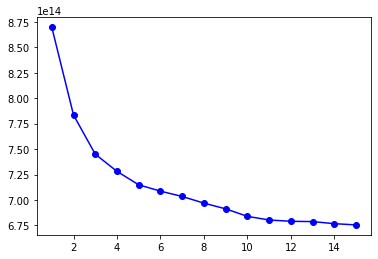

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

kvals = range(1, 16)
plt.plot(kvals, rss_all,'bo-')

In [41]:
predict_value = compute_distances_k_all(14, features_train, output_train, features_test)
residual = (output_test - predict_value)
rss = sum(residual**2)
print (rss)

223023963137738.9
